In [11]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier , MLPRegressor
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
np.random.seed(42)

In [ ]:
trainData = pd.read_csv('FashionMnist/fashion-mnist_train.csv') # read the data
testData = pd.read_csv('FashionMnist/fashion-mnist_test.csv')   # read the data

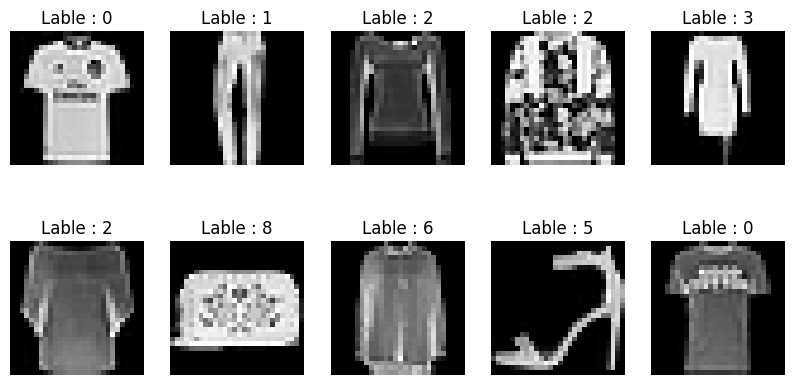

In [26]:
trainData = trainData[:8000] # take only 8000 samples
testData = testData[:2000] # take only 2000 samples
xTrain = trainData.iloc[:,1:].values/255.0 # normalize the data
XTrainStore = xTrain # store the data for later use
yTrain = trainData.iloc[:,0].values # get the labels
YTrainStore = yTrain # store the labels for later use
xTest = testData.iloc[:,1:].values/255.0 # normalize the data
yTest = testData.iloc[:,0].values # get the labels
plt.figure(figsize=(10,5)) # plot the first 10 images
for i in range(10): 
    plt.subplot(2 , 5 , i+1) 
    plt.imshow(xTest[i].reshape(28,28) , cmap='gray')  
    plt.axis('off') 
    plt.title(f'Lable : {yTest[i]}')
plt.show() 

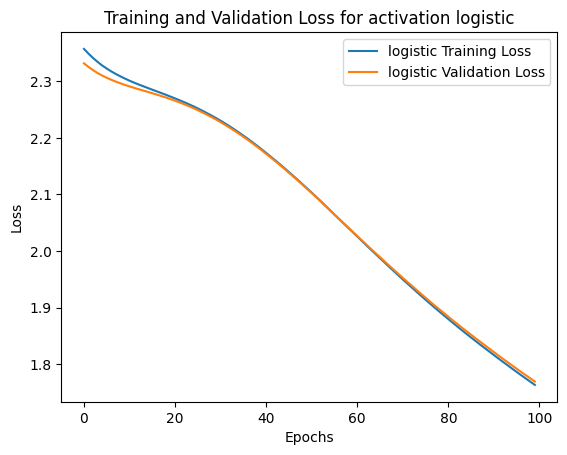

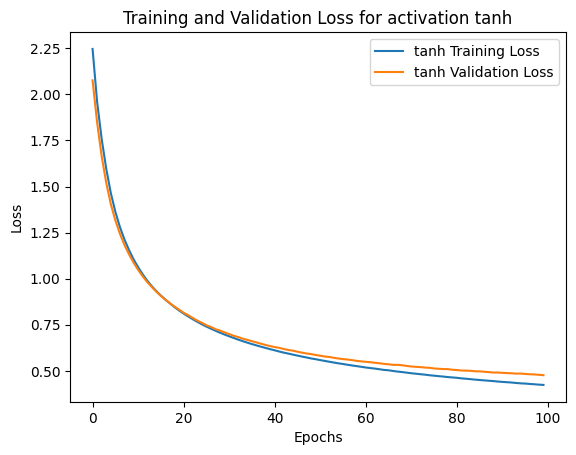

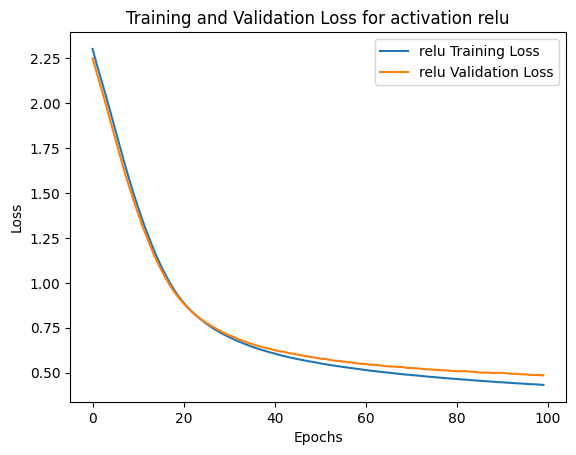

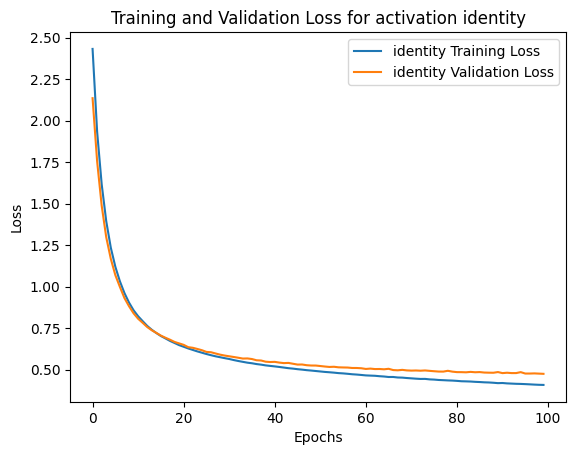

In [ ]:
import warnings # ignore warnings
warnings.filterwarnings('ignore') 
activationFunction = ['logistic' , 'tanh' , 'relu' , 'identity'] # activation functions
res = {} # store the results
XTrain , XVal , YTrain , YVal = train_test_split(xTrain , yTrain , test_size=0.2 , random_state=42) # split the data
for i in activationFunction: # loop over the activation functions
    modelMLP = MLPClassifier(hidden_layer_sizes=(128 , 64 ,32) , max_iter=1 , activation=i , solver='adam' , # create the model 
                             batch_size=128 , learning_rate_init=2e-5 , warm_start=True)
    trainingLoss = [] ; valLoss = [] # store the loss
    for j in range(100): # loop over the epochs
        modelMLP.fit(XTrain , YTrain) # fit the model
        trainingLoss.append(modelMLP.loss_) # store the loss
        valPred = modelMLP.predict_proba(XVal)  # get the validation predictions
        valLoss.append(log_loss(YVal , valPred)) # store the loss
    res[i] = [trainingLoss , valLoss] # store the results
    plt.plot(trainingLoss , label=f'{i} Training Loss') # plot the training loss
    plt.plot(valLoss , label=f'{i} Validation Loss') # plot the validation loss
    plt.xlabel('Epochs') # set the x label
    plt.ylabel('Loss') # set the y label
    plt.title(f'Training and Validation Loss for activation {i}') # set the title
    plt.legend() # show the legend
    plt.show() # show the plot
    

In [ ]:
accActivation = {} # store the accuracies
for i in activationFunction: # loop over the activation functions
    model = MLPClassifier(hidden_layer_sizes=(128 , 64 , 32) ,max_iter=1 , activation=i , solver='adam' , # create the model
                          batch_size=128 , learning_rate_init=2e-5 , warm_start=True)
    for j in range(100): # loop over the epochs
        model.fit(XTrain , YTrain) # fit the model
    yTestPred = model.predict(xTest) # get the test predictions
    testAcc = accuracy_score(yTest , yTestPred) # get the accuracy
    accActivation[i] = testAcc # store the accuracy
    print(f'Test Accuracy for activation {i} : {testAcc}') # print the accuracy
bestAct = max(accActivation , key=accActivation.get) # get the best activation function
    

Test Accuracy for activation logistic : 0.2165
Test Accuracy for activation tanh : 0.8285
Test Accuracy for activation relu : 0.8335
Test Accuracy for activation identity : 0.8295


So got the best activation function is relu

In [ ]:
params={
    'solver' :['adam' , 'sgd' , 'lbfgs'],  # solvers
    'learning_rate_init' : [1e-4 , 1e-3 , 1e-2 , 2e-5], # learning rates
    'batch_size' : [64 , 128 , 256] # batch sizes
}
model = MLPClassifier(hidden_layer_sizes=(128 , 64 , 32) , max_iter=100 , activation='relu' , random_state=42) # create the model
gridSearch = GridSearchCV(estimator=model , param_grid=params , cv=3 , scoring='accuracy' , n_jobs=-1 , verbose=2) # create the grid search
gridSearch.fit(XTrain , YTrain) # fit the grid search
bestParameters = gridSearch.best_params_ # get the best parameters
print(f'Best Parameters : {bestParameters}') # print the best parameters
bestscore = gridSearch.best_score_ # get the best score
print(f'Best cross validation accuracy : {bestscore:.4f}') # print the best score
bestModel = gridSearch.best_estimator_ # get the best model
testacc = bestModel.score(xTest , yTest) # get the test accuracy
print(f'Test Accuracy with best parameters: {testacc:.4f}') # print the test accuracy

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters : {'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best cross validation accuracy : 0.8537
Test Accuracy with best parameters: 0.8480


Training a MLPRegressor from sklearn’s neural network module on a regeneration task:

In [ ]:
c , b , a = 784 ,392 , 196 # hidden layer sizes
layerSize = [c , b , a , b , c] # hidden layer sizes
XTrainreg , XValreg = train_test_split(XTrainStore , test_size=0.2 , random_state=42) # split the data
def regenator(act):  # function to regenerate the model
    modelregressor = MLPRegressor(hidden_layer_sizes=layerSize , activation=act , solver='adam' , learning_rate_init=2e-5 , max_iter=1 , warm_start=True , random_state=42) # create the model
    trainLoss = [] ; valLoss = [] # store the loss
    for i in range(50): # loop over the epochs
        modelregressor.fit(XTrain , XTrain) # fit the model
        trainlossval = mean_squared_error(XTrain , modelregressor.predict(XTrain)) # get the train loss
        vallossval = mean_squared_error(XVal , modelregressor.predict(XVal)) # get the validation loss
        trainLoss.append(trainlossval) ; valLoss.append(vallossval) # store the loss
        print(f'Epoch {i} : Train Loss : {trainlossval:.4f} , Validation Loss : {vallossval:.4f} for activation {act}') # print the loss
    return modelregressor , trainLoss , valLoss # return the model and the loss

Epoch 0 : Train Loss : 0.1829 , Validation Loss : 0.1850 for activation relu
Epoch 1 : Train Loss : 0.1369 , Validation Loss : 0.1383 for activation relu
Epoch 2 : Train Loss : 0.0971 , Validation Loss : 0.0979 for activation relu
Epoch 3 : Train Loss : 0.0716 , Validation Loss : 0.0722 for activation relu
Epoch 4 : Train Loss : 0.0587 , Validation Loss : 0.0591 for activation relu
Epoch 5 : Train Loss : 0.0522 , Validation Loss : 0.0524 for activation relu
Epoch 6 : Train Loss : 0.0471 , Validation Loss : 0.0472 for activation relu
Epoch 7 : Train Loss : 0.0429 , Validation Loss : 0.0429 for activation relu
Epoch 8 : Train Loss : 0.0397 , Validation Loss : 0.0396 for activation relu
Epoch 9 : Train Loss : 0.0372 , Validation Loss : 0.0371 for activation relu
Epoch 10 : Train Loss : 0.0352 , Validation Loss : 0.0351 for activation relu
Epoch 11 : Train Loss : 0.0335 , Validation Loss : 0.0335 for activation relu
Epoch 12 : Train Loss : 0.0321 , Validation Loss : 0.0320 for activation r

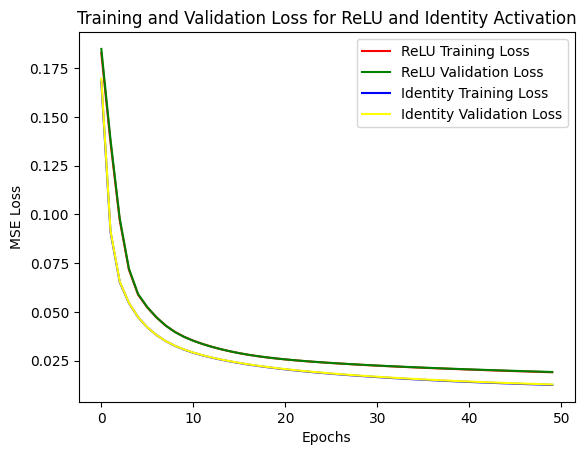

In [ ]:
reluModel , reluTrainLoss , reluValLoss = regenator('relu') # get the model and the loss for relu
identityModel , identityTrainLoss , identityValLoss = regenator('identity') # get the model and the loss for identity
plt.plot(reluTrainLoss , label='ReLU Training Loss' , color='red') # plot the relu training loss
plt.plot(reluValLoss , label='ReLU Validation Loss' , color='green')    # plot the relu validation loss
plt.plot(identityTrainLoss , label='Identity Training Loss' , color='blue') # plot the identity training loss
plt.plot(identityValLoss , label='Identity Validation Loss' , color='yellow') # plot the identity validation loss
plt.xlabel('Epochs') # set the x label
plt.ylabel('MSE Loss') # set the y label
plt.title('Training and Validation Loss for ReLU and Identity Activation') # set the title
plt.legend() # show the legend
plt.show()  # show the plot

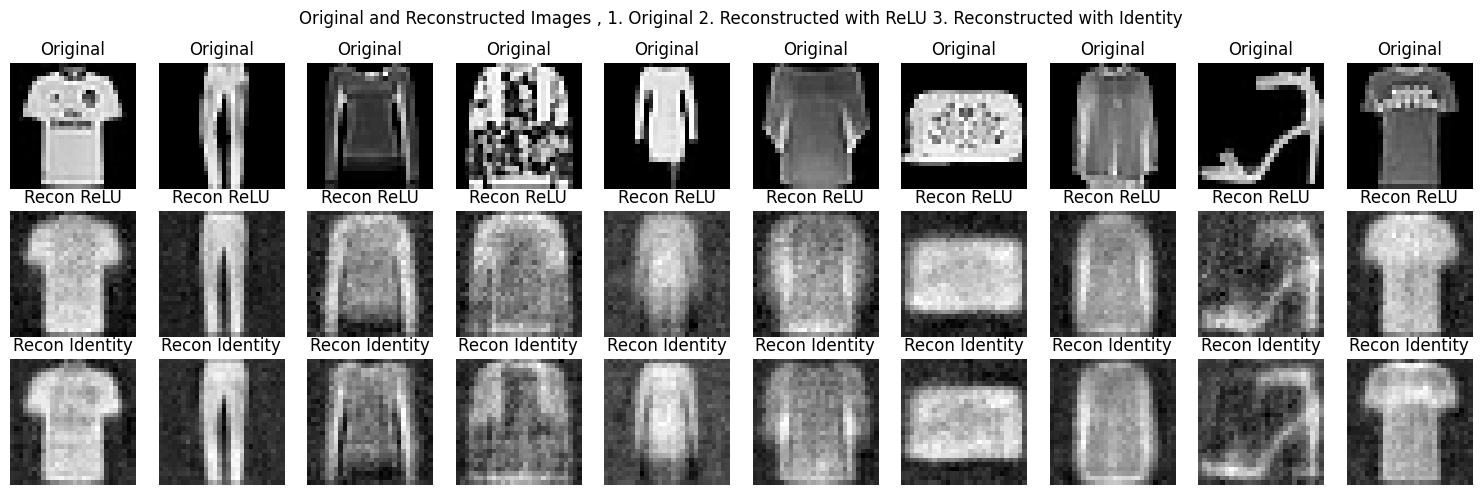

In [ ]:
fig , ax = plt.subplots(3 , 10 , figsize = (15 , 5)) # plot the original and reconstructed images
xtestSample = xTest[:10] # take the first 10 samples
for i , val in enumerate(xtestSample): # loop over the samples
    original = val.reshape(28 , 28) # get the original image
    reconstructedReluVal = reluModel.predict(val.reshape(1 , -1)).reshape(28 , 28) # get the reconstructed image with relu
    reconstructedIdentity = identityModel.predict(val.reshape(1 , -1)).reshape(28 , 28) # get the reconstructed image with identity
    ax[0 , i].imshow(original , cmap='gray') ; ax[0,i].axis('off') ; ax[0,i].set_title('Original') # plot the original image
    ax[1,i].imshow(reconstructedReluVal , cmap='gray') ;ax[1,i].axis('off') ;ax[1,i].set_title('Recon ReLU') # plot the reconstructed image with relu
    ax[2,i].imshow(reconstructedIdentity , cmap='gray') ; ax[2,i].axis('off') ; ax[2,i].set_title('Recon Identity') # plot the reconstructed image with identity
plt.suptitle('Original and Reconstructed Images , 1. Original 2. Reconstructed with ReLU 3. Reconstructed with Identity') # set the title
plt.tight_layout() ; plt.show() # show the plot

In [ ]:
def activation_func1(act): # function to get the activation function
    if act == 'relu': 
        return lambda x : np.maximum(0 , x) 
    elif act == 'identity':
        return lambda x : x
def extractfeatures(model , val , act): # function to extract the features
    features = []
    batchSize = 500  # batch size
    nVal = val.shape[0] # get the number of samples
    getact = activation_func1(act) # get the activation function
    for i in range(0 , nVal , batchSize): # loop over the samples
        currBatch = val[i:min(i+batchSize , nVal)] # get the current batch
        currLayer = currBatch  # get the current layer
        for j in range(3): # loop over the layers
            currLayer = getact(currLayer.dot(model.coefs_[j]) + model.intercepts_[j]) # get the current layer
            
        features.append(currLayer) # store the features
    return np.vstack(features) # return the features
        
trainFeatureRelu = extractfeatures(reluModel , XTrainStore , 'relu') # get the features for relu
testFeatureRelu = extractfeatures(reluModel , xTest  , 'relu') # get the features for relu
trainFeatureIdentity = extractfeatures(identityModel , XTrainStore , 'identity') # get the features for identity
testFeatureIdentity = extractfeatures(identityModel , xTest , 'identity') # get the features for identity
print(f'ReLU Train Feature Shape : {trainFeatureRelu.shape} , ReLU Test Feature Shape : {testFeatureRelu.shape}')   
print(f'Identity Train Feature Shape : {trainFeatureIdentity.shape} , Identity Test Feature Shape : {testFeatureIdentity.shape}') 

def mlpClassifier(trainFeature , testFeature , yTrain , yTest ): # function to classify the features
    model = MLPClassifier(hidden_layer_sizes=(a,a) , max_iter=200 , activation='relu' , solver='adam' , random_state=42 , learning_rate_init=2e-5) # create the model
    model.fit(trainFeature , yTrain) # fit the model
    yTrainPred = model.predict(trainFeature) ; yTestPred = model.predict(testFeature)  # get the predictions
    trainAcc = accuracy_score(yTrain , yTrainPred) ; testAcc = accuracy_score(yTest , yTestPred) # get the accuracy
    return trainAcc , testAcc
reluTrainAcc , reluTestAcc = mlpClassifier(trainFeatureRelu , testFeatureRelu , YTrainStore , yTest) # get the accuracy for relu
identityTrainAcc , identityTestAcc = mlpClassifier(trainFeatureIdentity , testFeatureIdentity , YTrainStore , yTest) # get the accuracy for identity
print(f'Train Accuracy for ReLU : {reluTrainAcc:.4f} , Test Accuracy for ReLU : {reluTestAcc:.4f}') # print the accuracy
print(f'Train Accuracy for Identity : {identityTrainAcc:.4f} , Test Accuracy for Identity : {identityTestAcc:.4f}') # print the accuracy

ReLU Train Feature Shape : (8000, 196) , ReLU Test Feature Shape : (2000, 196)
Identity Train Feature Shape : (8000, 196) , Identity Test Feature Shape : (2000, 196)
Train Accuracy for ReLU : 0.8300 , Test Accuracy for ReLU : 0.8160
Train Accuracy for Identity : 0.8668 , Test Accuracy for Identity : 0.8370
